In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fatsttext-common-crawl/crawl-300d-2M.vec
/kaggle/input/fatsttext-common-crawl/crawl-300d-2M/crawl-300d-2M.vec
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv


In [ ]:
"""!wget http://nlp.stanford.edu/data/glove.6B.zip

!unzip glove*.zip 

!rm glove.6B.zip"""

In [10]:
with open('../input/fatsttext-common-crawl/crawl-300d-2M.vec') as f:
    lines = f.readlines()
del lines[0]

In [2]:
dataset = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

In [3]:
dataset.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
print("Shape of the dataset:", dataset.shape)
print("--------------------------------------")
print("Total no. of unique values in each column: ")
print(dataset.nunique())
print("--------------------------------------")

Shape of the dataset: (7613, 5)
--------------------------------------
Total no. of unique values in each column: 
id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64
--------------------------------------


In [5]:
text_dataset = dataset[["text", "target"]]

In [12]:
text_dataset["text"] = text_dataset["text"].apply(clean)

KeyboardInterrupt: 

In [14]:
import re
import string

class preprocess:
    def __init__(self, dataset):
        self.dataset = dataset
        
    def lower_case(self, row):
        return row.lower()
    
    def remove_urls(self, row):
        pattern = '((ftp|http|https):\/\/)?(www.)?(?!.*(ftp|http|https|www.))[a-zA-Z0-9_-]+(\.[a-zA-Z]+)+((\/)[\w#]+)*(\/\w+\?[a-zA-Z0-9_]+=\w+(&[a-zA-Z0-9_]+=\w+)*)?$'
        new_row = re.sub(pattern, ' ', row)
        return new_row
    
    def remove_punctuation(self, row):
        new_row = row.translate(str.maketrans("", "", string.punctuation)) 
        return new_row
    
    def remove_numbers(self, row):
        new_row = row.translate(str.maketrans("", "", string.digits)) 
        return new_row
    
    def remove_at_tags(self, row):
        new_row = re.sub("@[a-zA-Z0-9._]*", ' ', row)
        return new_row
    
    def remove_empty_spaces(self, row):
        return " ".join(row.split())
    
    def forward(self):
        self.dataset["text"] = self.dataset["text"].apply(self.lower_case)
        self.dataset["text"] = self.dataset["text"].apply(self.remove_urls)
        self.dataset["text"] = self.dataset["text"].apply(self.remove_at_tags)
        self.dataset["text"] = self.dataset["text"].apply(self.remove_punctuation)
        self.dataset["text"] = self.dataset["text"].apply(self.remove_numbers)
        self.dataset["text"] = self.dataset["text"].apply(self.remove_empty_spaces)
        return self.dataset

In [15]:
test = preprocess(text_dataset)
test.forward()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders in ...,1
4,just got sent this photo from ruby alaska as s...,1
...,...,...
7608,two giant cranes holding a bridge collapse int...,1
7609,the out of control wild fires in california ev...,1
7610,m utckm s of volcano hawaii,1
7611,police investigating after an ebike collided w...,1


In [8]:
from collections import Counter
def n_grams(count, dataset):
    n_grams_1 = []
    for row in dataset["text"]:
        total_words = row.split(' ')
        for i in range(0,len(total_words)-(count-1)):
            n_grams_1.append(' '.join(total_words[i:count+i]))
    n_grams_1 = Counter(n_grams_1)
    df = pd.DataFrame(list(n_grams_1.items()), columns=['words', 'count'])
    df.sort_values(by=['count'], ascending=False, inplace=True)
    
    fig = sns.barplot(x = df["words"][:20], y= df["count"][:20])
    plt.xticks(rotation=90)
    plt.title("words")
    return fig

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


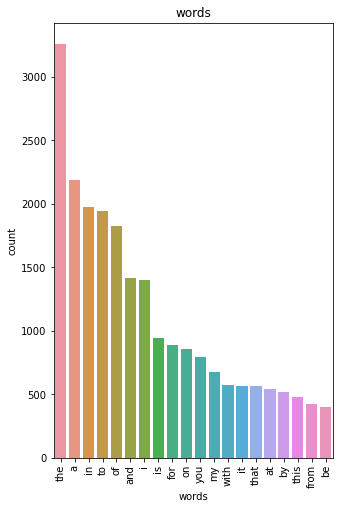

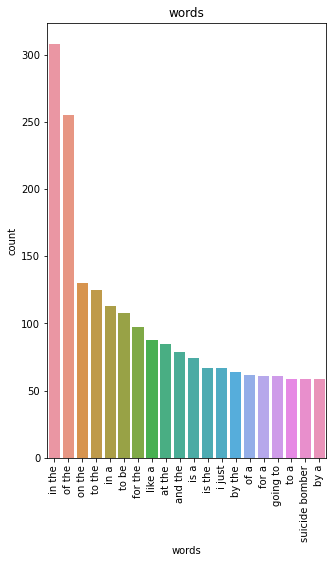

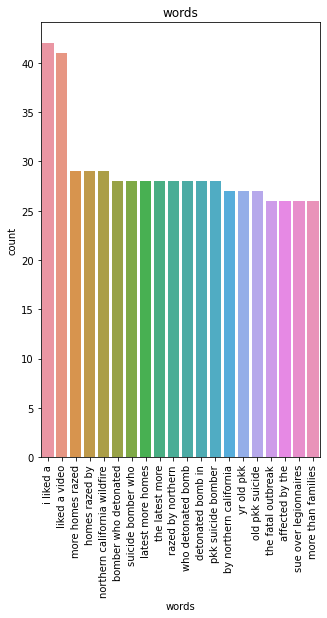

In [9]:
for k in range(1,4):
    fig = plt.figure(figsize=(5, 8))
    for i in range(1, 2):
        plt.subplot(1, 1, i)
        print(n_grams(k, text_dataset))

In [16]:
vocab_list = []
for _, row in text_dataset.iterrows():
    vocab_list.extend(str(row).split())

In [17]:
from tqdm import tqdm

In [ ]:
embeddings_index = {}

In [33]:
# fasttext word embeddings
for line in tqdm(lines[-100000:]):
    values = line.split()
    word = values[0]
    if word in vocab_list:
        coefs = np.asarray(values[-300:], dtype='float32')
        embeddings_index[word] = coefs
    if len(embeddings_index)==len(vocab_list):
        print("done")

  6%|▌         | 5844/100000 [00:12<03:20, 468.74it/s]


KeyboardInterrupt: 

In [ ]:
# Glove word embeddings
"""
total_words = vocab_list
total_words = set(total_words)
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.300d.txt', encoding='utf-8')

for line in f:
    values = line.split()
    word = values[0]
    if word in total_words:
        coefs = np.asarray(values[-300:], dtype='float32')
        embeddings_index[word] = coefs
    if len(embeddings_index)==len(total_words):
        print("done")
f.close()
print('Found %s word vectors.' % len(embeddings_index))"""

In [34]:
len(embeddings_index)

8178

In [35]:
len(set(vocab_list))

19375

In [36]:
def convert_word_embeddings(sentence):
    sentence_with_word_embeddings = []
    for each in sentence.split():
        if each in embeddings_index:
            sentence_with_word_embeddings.append(embeddings_index[each])
        #else:
        #    sentence_with_word_embeddings.append(np.zeros(100))
    return sentence_with_word_embeddings

text_dataset["text"] = text_dataset["text"].apply(convert_word_embeddings)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import GRU, Dense, Input, Embedding, TimeDistributed, Dropout, Activation, BatchNormalization, LSTM, concatenate, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(text_dataset["text"], text_dataset["target"], stratify = text_dataset["target"], test_size=0.2)

In [39]:
X_train.shape

(6090,)

In [40]:
X_train = pad_sequences(X_train, maxlen = 15, padding = 'pre', dtype="float32")
X_val = pad_sequences(X_val, maxlen = 15, padding = 'pre', dtype="float32")

y_train = np.array(y_train)
y_val = np.array(y_val)

In [51]:
sequence_1_input = Input(shape = (15, 300))

x = LSTM(256, return_sequences = False)(sequence_1_input)
x = BatchNormalization()(x)                        

x = Dense(50, activation='relu')(x)
x = BatchNormalization()(x)   

preds = Dense(1, activation='sigmoid')(x)

model = Model(inputs = sequence_1_input, outputs = preds)

model.compile(loss='binary_crossentropy', optimizer = 'adam')
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 15, 300)]         0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               570368    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 571,649
Trainable params: 571,137
Non-trainable params: 512
_________________________________________________________________


In [52]:
model.fit(X_train, y_train,
              validation_data=(X_val, y_val), epochs = 10,
              batch_size = 1024)


Epoch 1/10
6/6 [==============================] - 3s 511ms/step - loss: 0.5757 - val_loss: 0.6443
Epoch 2/10
6/6 [==============================] - 3s 441ms/step - loss: 0.4427 - val_loss: 0.6306
Epoch 3/10
6/6 [==============================] - 3s 431ms/step - loss: 0.3989 - val_loss: 0.6304
Epoch 4/10
6/6 [==============================] - 3s 428ms/step - loss: 0.3720 - val_loss: 0.6231
Epoch 5/10
6/6 [==============================] - 3s 461ms/step - loss: 0.3503 - val_loss: 0.6229
Epoch 6/10
6/6 [==============================] - 3s 431ms/step - loss: 0.3315 - val_loss: 0.6213
Epoch 7/10
6/6 [==============================] - 3s 427ms/step - loss: 0.3162 - val_loss: 0.6144
Epoch 8/10
6/6 [==============================] - 3s 429ms/step - loss: 0.3036 - val_loss: 0.6174
Epoch 9/10
6/6 [==============================] - 3s 493ms/step - loss: 0.2889 - val_loss: 0.6104
Epoch 10/10
6/6 [==============================] - 3s 468ms/step - loss: 0.2729 - val_loss: 0.6073


In [ ]:
y_train.shape